In [1]:
# Ultra-Minimal Training Test for M2 MacBook Air (8GB RAM)
# File: notebooks/minimal_training_test.ipynb
# Run each cell individually to test step by step

# CELL 1: Environment Setup and Path Configuration
import sys
import os
from pathlib import Path
import gc
import torch

# Set working directory to project root
project_root = Path.cwd()
if project_root.name == 'notebooks':
    project_root = project_root.parent
    os.chdir(project_root)

print(f"🔍 Working from: {project_root}")
print(f"🐍 Python: {sys.version}")

# Add project to path
sys.path.insert(0, str(project_root))

# Check memory
if torch.backends.mps.is_available():
    print("✅ MPS (Metal) available")
else:
    print("ℹ️ Using CPU only")

print(f"💾 System info complete")

🔍 Working from: /Users/jamesliu/Documents/GitHub/skyguard
🐍 Python: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 12:55:35) [Clang 14.0.6 ]
✅ MPS (Metal) available
💾 System info complete


In [2]:
# CELL 2: Ultra-Light Environment Test
print("🧪 TESTING ULTRA-LIGHT ENVIRONMENT")
print("=" * 50)

# Force garbage collection to free memory
gc.collect()

try:
    # Test basic imports with minimal memory
    from ultralytics import YOLO
    print("✅ Ultralytics imported successfully")
    
    # Test model loading with minimal overhead
    print("📦 Testing minimal model loading...")
    model = YOLO('yolo11n.pt')  # This might download if not cached
    print("✅ YOLOv11n loaded successfully")
    
    # Clear model from memory immediately
    del model
    gc.collect()
    print("🗑️ Model cleared from memory")
    
except Exception as e:
    print(f"❌ Basic test failed: {e}")
    print("💡 Try: pip install ultralytics")


🧪 TESTING ULTRA-LIGHT ENVIRONMENT
✅ Ultralytics imported successfully
📦 Testing minimal model loading...
✅ YOLOv11n loaded successfully
🗑️ Model cleared from memory


In [3]:
# CELL 3: Minimal Dataset Validation
print("\n🔍 MINIMAL DATASET CHECK")
print("=" * 50)

# Check if our converted data exists
processed_path = project_root / "data" / "processed" / "vision" / "visdrone_yolo"
dataset_yaml = processed_path / "dataset.yaml"

if dataset_yaml.exists():
    print(f"✅ Found processed dataset: {processed_path}")
    
    # Count images in each split
    for split in ['train', 'val', 'test']:
        img_dir = processed_path / "images" / split
        if img_dir.exists():
            count = len(list(img_dir.glob("*.jpg")))
            print(f"   📸 {split}: {count} images")
        else:
            print(f"   ❌ {split}: Missing")
else:
    print(f"❌ No processed dataset found")
    print("💡 Need to run data conversion first")


🔍 MINIMAL DATASET CHECK
✅ Found processed dataset: /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo
   📸 train: 6471 images
   📸 val: 548 images
   📸 test: 1610 images


In [4]:
# CELL 4: Ultra-Minimal Training Settings Test
print("\n⚡ ULTRA-MINIMAL SETTINGS TEST")
print("=" * 50)

# These are the most minimal settings possible for M2 8GB
ultra_minimal_settings = {
    'epochs': 1,           # Just 1 epoch
    'imgsz': 160,          # Tiny images (1/4 of normal)
    'batch': 1,            # Single image at a time
    'device': 'cpu',       # Force CPU (more stable on M2)
    'workers': 1,          # Single worker thread
    'patience': 50,        # No early stopping
    'save': False,         # Don't save intermediate checkpoints
    'plots': False,        # No plots to save memory
    'verbose': False,      # Minimal output
    'cache': False,        # Don't cache images
    'close_mosaic': 0,     # Disable mosaic augmentation
}

print("🔧 Ultra-minimal settings:")
for key, value in ultra_minimal_settings.items():
    print(f"   • {key}: {value}")

print("\n💡 These settings use:")
print("   • 160px images (vs 640px normal)")
print("   • Batch size 1 (vs 16 normal)")
print("   • CPU only (vs GPU)")
print("   • No augmentation or caching")
print("   • Minimal memory footprint")



⚡ ULTRA-MINIMAL SETTINGS TEST
🔧 Ultra-minimal settings:
   • epochs: 1
   • imgsz: 160
   • batch: 1
   • device: cpu
   • workers: 1
   • patience: 50
   • save: False
   • plots: False
   • verbose: False
   • cache: False
   • close_mosaic: 0

💡 These settings use:
   • 160px images (vs 640px normal)
   • Batch size 1 (vs 16 normal)
   • CPU only (vs GPU)
   • No augmentation or caching
   • Minimal memory footprint


In [5]:
# CELL 5: Memory-Conscious Model Test
print("\n🧠 MEMORY-CONSCIOUS MODEL TEST")
print("=" * 50)

try:
    # Clear any existing memory
    gc.collect()
    
    # Load model with minimal settings
    print("📦 Loading YOLOv11n with minimal memory...")
    model = YOLO('yolo11n.pt')
    
    # Test prediction on a single small image to verify it works
    test_img_dir = project_root / "data" / "raw" / "vision" / "visdrone" / "VisDrone2019-DET-val" / "images"
    
    if test_img_dir.exists():
        test_images = list(test_img_dir.glob("*.jpg"))
        if test_images:
            print(f"🖼️ Testing prediction on: {test_images[0].name}")
            
            # Single prediction with minimal settings
            results = model.predict(
                source=str(test_images[0]),
                imgsz=160,          # Very small
                conf=0.5,           # Higher confidence to reduce detections
                device='cpu',       # Force CPU
                verbose=False,      # Quiet
                save=False,         # Don't save
                show=False          # Don't display
            )
            
            print(f"✅ Prediction successful!")
            print(f"   📊 Found {len(results[0].boxes)} detections")
            
            # Clean up immediately
            del results
        else:
            print("❌ No test images found")
    else:
        print("❌ Test image directory not found")
    
    # Clean up model
    del model
    gc.collect()
    print("🗑️ Model cleaned from memory")
    
except Exception as e:
    print(f"❌ Model test failed: {e}")


🧠 MEMORY-CONSCIOUS MODEL TEST
📦 Loading YOLOv11n with minimal memory...
🖼️ Testing prediction on: 0000271_01401_d_0000380.jpg
✅ Prediction successful!
   📊 Found 0 detections
🗑️ Model cleaned from memory


In [6]:
# CELL 6: Micro-Training Test (Run this only if above cells work)
print("\n🔬 MICRO-TRAINING TEST")
print("=" * 50)
print("⚠️ WARNING: This will attempt actual training")
print("💡 Expected time: 2-5 minutes on M2 Air")

# Only proceed if user confirms
proceed = input("Proceed with micro-training? (y/n): ").lower().strip() == 'y'

if proceed:
    try:
        gc.collect()  # Clear memory first
        
        # Load model
        model = YOLO('yolo11n.pt')
        
        # Check if we have processed data, otherwise use VisDrone.yaml
        if dataset_yaml.exists():
            data_path = str(dataset_yaml)
            print(f"📁 Using processed dataset: {data_path}")
        else:
            data_path = "VisDrone.yaml"
            print(f"📁 Using VisDrone.yaml (will auto-download)")
        
        print("🚀 Starting micro-training...")
        print("📊 Progress will be minimal to save memory")
        
        # Ultra-minimal training
        results = model.train(
            data=data_path,
            epochs=1,
            imgsz=160,
            batch=1,
            device='cpu',
            workers=1,
            patience=50,
            save=False,
            plots=False,
            verbose=True,  # Show some progress
            cache=False,
            close_mosaic=0,
            project=str(project_root / "runs" / "detect"),
            name="micro_test",
            exist_ok=True
        )
        
        print("🎉 Micro-training completed!")
        print("✅ Your setup works for training!")
        
        # Show results if available
        if hasattr(results, 'box') and hasattr(results.box, 'map50'):
            print(f"📊 mAP@0.5: {results.box.map50:.3f}")
        
        # Clean up
        del model, results
        gc.collect()
        
    except Exception as e:
        print(f"❌ Micro-training failed: {e}")
        print("💡 This might be normal - your M2 Air might need even lighter settings")
        
        # Try even more minimal fallback
        print("\n🔧 Trying validation-only test...")
        try:
            model = YOLO('yolo11n.pt')
            val_results = model.val(
                data="VisDrone.yaml",
                imgsz=160,
                batch=1,
                device='cpu',
                verbose=False
            )
            print("✅ Validation test worked!")
            del model, val_results
            gc.collect()
        except Exception as e2:
            print(f"❌ Even validation failed: {e2}")

else:
    print("⏭️ Skipping micro-training")


🔬 MICRO-TRAINING TEST
⚠️ WARNING: This will attempt actual training
💡 Expected time: 2-5 minutes on M2 Air
📁 Using processed dataset: /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/dataset.yaml
🚀 Starting micro-training...
📊 Progress will be minimal to save memory
Ultralytics 8.3.147 🚀 Python-3.13.2 torch-2.7.0 CPU (Apple M2)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=0, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7,

train: Scanning /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/labels/train.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/images/train/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/images/train/0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/images/train/9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/images/train/9999987_00000_d_0000049.jpg: 1 duplicate labels removed
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 407.7±80.8 MB/s, size: 131.6 KB)



val: Scanning /Users/jamesliu/Documents/GitHub/skyguard/data/processed/vision/visdrone_yolo/labels/val.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 0 dataloader workers
Logging results to /Users/jamesliu/Documents/GitHub/skyguard/runs/detect/micro_test
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        1/1         0G      3.383      3.152      1.004         50        160: 100%|██████████| 6471/6471 [11:25<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 274/274 [00:13<00:00, 20.93it/s]


                   all        548      38759      0.443     0.0203     0.0164    0.00613

1 epochs completed in 0.195 hours.
Optimizer stripped from /Users/jamesliu/Documents/GitHub/skyguard/runs/detect/micro_test/weights/last.pt, 5.4MB
Optimizer stripped from /Users/jamesliu/Documents/GitHub/skyguard/runs/detect/micro_test/weights/best.pt, 5.4MB

Validating /Users/jamesliu/Documents/GitHub/skyguard/runs/detect/micro_test/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.13.2 torch-2.7.0 CPU (Apple M2)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 274/274 [03:13<00:00,  1.42it/s]


                   all        548      38759      0.443     0.0203     0.0164    0.00613
            pedestrian        520       8844     0.0189   0.000113    0.00356   0.000982
                people        482       5125          1          0    0.00224   0.000535
               bicycle        364       1287          1          0          0          0
                   car        515      14064      0.323      0.136      0.125     0.0474
                   van        421       1975     0.0627      0.043      0.014    0.00512
                 truck        266        750      0.018     0.0198    0.00721    0.00255
              tricycle        337       1045          1          0    0.00388    0.00164
       awning-tricycle        220        532          1          0    0.00165   0.000823
                   bus        131        251    0.00472    0.00398    0.00178   0.000798
                 motor        485       4886          0          0    0.00536    0.00146
Speed: 0.1ms preproce

In [8]:
# CELL 7: Results and Recommendations
print("\n📋 RESULTS AND RECOMMENDATIONS")
print("=" * 50)

# Check if any training results exist
runs_dir = project_root / "runs" / "detect"
if runs_dir.exists() and any(runs_dir.iterdir()):
    print("✅ Some training results found:")
    for run_dir in sorted(runs_dir.iterdir(), key=lambda x: x.stat().st_mtime, reverse=True)[:3]:
        if run_dir.is_dir():
            print(f"   📁 {run_dir.name}")
else:
    print("ℹ️ No training results yet")

print("\n🎯 RECOMMENDATIONS FOR M2 AIR 8GB:")
print("1. 💾 Use swap space: System Preferences > Memory")
print("2. 🔧 Optimal settings for your hardware:")
print("   yolo detect train data=VisDrone.yaml model=yolo11n.pt \\")
print("     epochs=20 imgsz=320 batch=2 device=cpu workers=2 \\")
print("     patience=5 cache=False plots=False")
print()
print("3. ⚡ For fastest testing:")
print("   yolo detect val model=yolo11n.pt data=VisDrone.yaml imgsz=320 batch=1")
print()
print("4. 🎮 If training is too slow, focus on:")
print("   • Data exploration and validation")
print("   • Model inference testing")
print("   • Deployment preparation")
print("   • Use cloud training for heavy work")

print("\n🎉 Testing complete!")
print("💡 Your M2 Air can handle the project - just needs optimized settings!")



📋 RESULTS AND RECOMMENDATIONS
✅ Some training results found:
   📁 skyguard_drone_detection_quick_test
   📁 train2
   📁 train3

🎯 RECOMMENDATIONS FOR M2 AIR 8GB:
1. 💾 Use swap space: System Preferences > Memory
2. 🔧 Optimal settings for your hardware:
   yolo detect train data=VisDrone.yaml model=yolo11n.pt \
     epochs=20 imgsz=320 batch=2 device=cpu workers=2 \
     patience=5 cache=False plots=False

3. ⚡ For fastest testing:
   yolo detect val model=yolo11n.pt data=VisDrone.yaml imgsz=320 batch=1

4. 🎮 If training is too slow, focus on:
   • Data exploration and validation
   • Model inference testing
   • Deployment preparation
   • Use cloud training for heavy work

🎉 Testing complete!
💡 Your M2 Air can handle the project - just needs optimized settings!


In [9]:
# CELL 8: Quick Success Validation
print("\n✅ QUICK SUCCESS CHECK")
print("=" * 50)

success_items = []

# Check 1: YOLO installation
try:
    from ultralytics import YOLO
    YOLO('yolo11n.pt')
    success_items.append("YOLO installation works")
except:
    pass

# Check 2: Data exists
if (project_root / "data" / "raw" / "vision" / "visdrone").exists():
    success_items.append("VisDrone data found")

# Check 3: Processed data
if dataset_yaml.exists():
    success_items.append("Processed YOLO dataset ready")

# Check 4: Training capability
if runs_dir.exists() and any(runs_dir.iterdir()):
    success_items.append("Training capability confirmed")

print(f"🎯 SUCCESS ITEMS ({len(success_items)}/4):")
for item in success_items:
    print(f"   ✅ {item}")

if len(success_items) >= 2:
    print("\n🎉 You have a functional setup!")
    print("🚀 Ready to proceed with optimized training or move to next phase")
else:
    print("\n⚠️ Some setup issues remain")
    print("💡 Focus on getting basic YOLO working first")

print("\n🔚 Notebook complete! Run cells individually to debug any issues.")


✅ QUICK SUCCESS CHECK
🎯 SUCCESS ITEMS (4/4):
   ✅ YOLO installation works
   ✅ VisDrone data found
   ✅ Processed YOLO dataset ready
   ✅ Training capability confirmed

🎉 You have a functional setup!
🚀 Ready to proceed with optimized training or move to next phase

🔚 Notebook complete! Run cells individually to debug any issues.



🖼️ YOLO PREDICTIONS vs ORIGINAL VISDRONE ANNOTATIONS
📸 Comparing YOLO predictions vs VisDrone ground truth for 3 images...
   📊 0000356_05097_d_0000655.jpg:
      🤖 YOLO detected: 13 objects
      📋 Ground truth: 114 objects
   📊 0000327_01201_d_0000717.jpg:
      🤖 YOLO detected: 16 objects
      📋 Ground truth: 69 objects
   📊 0000289_01401_d_0000818.jpg:
      🤖 YOLO detected: 0 objects
      📋 Ground truth: 39 objects


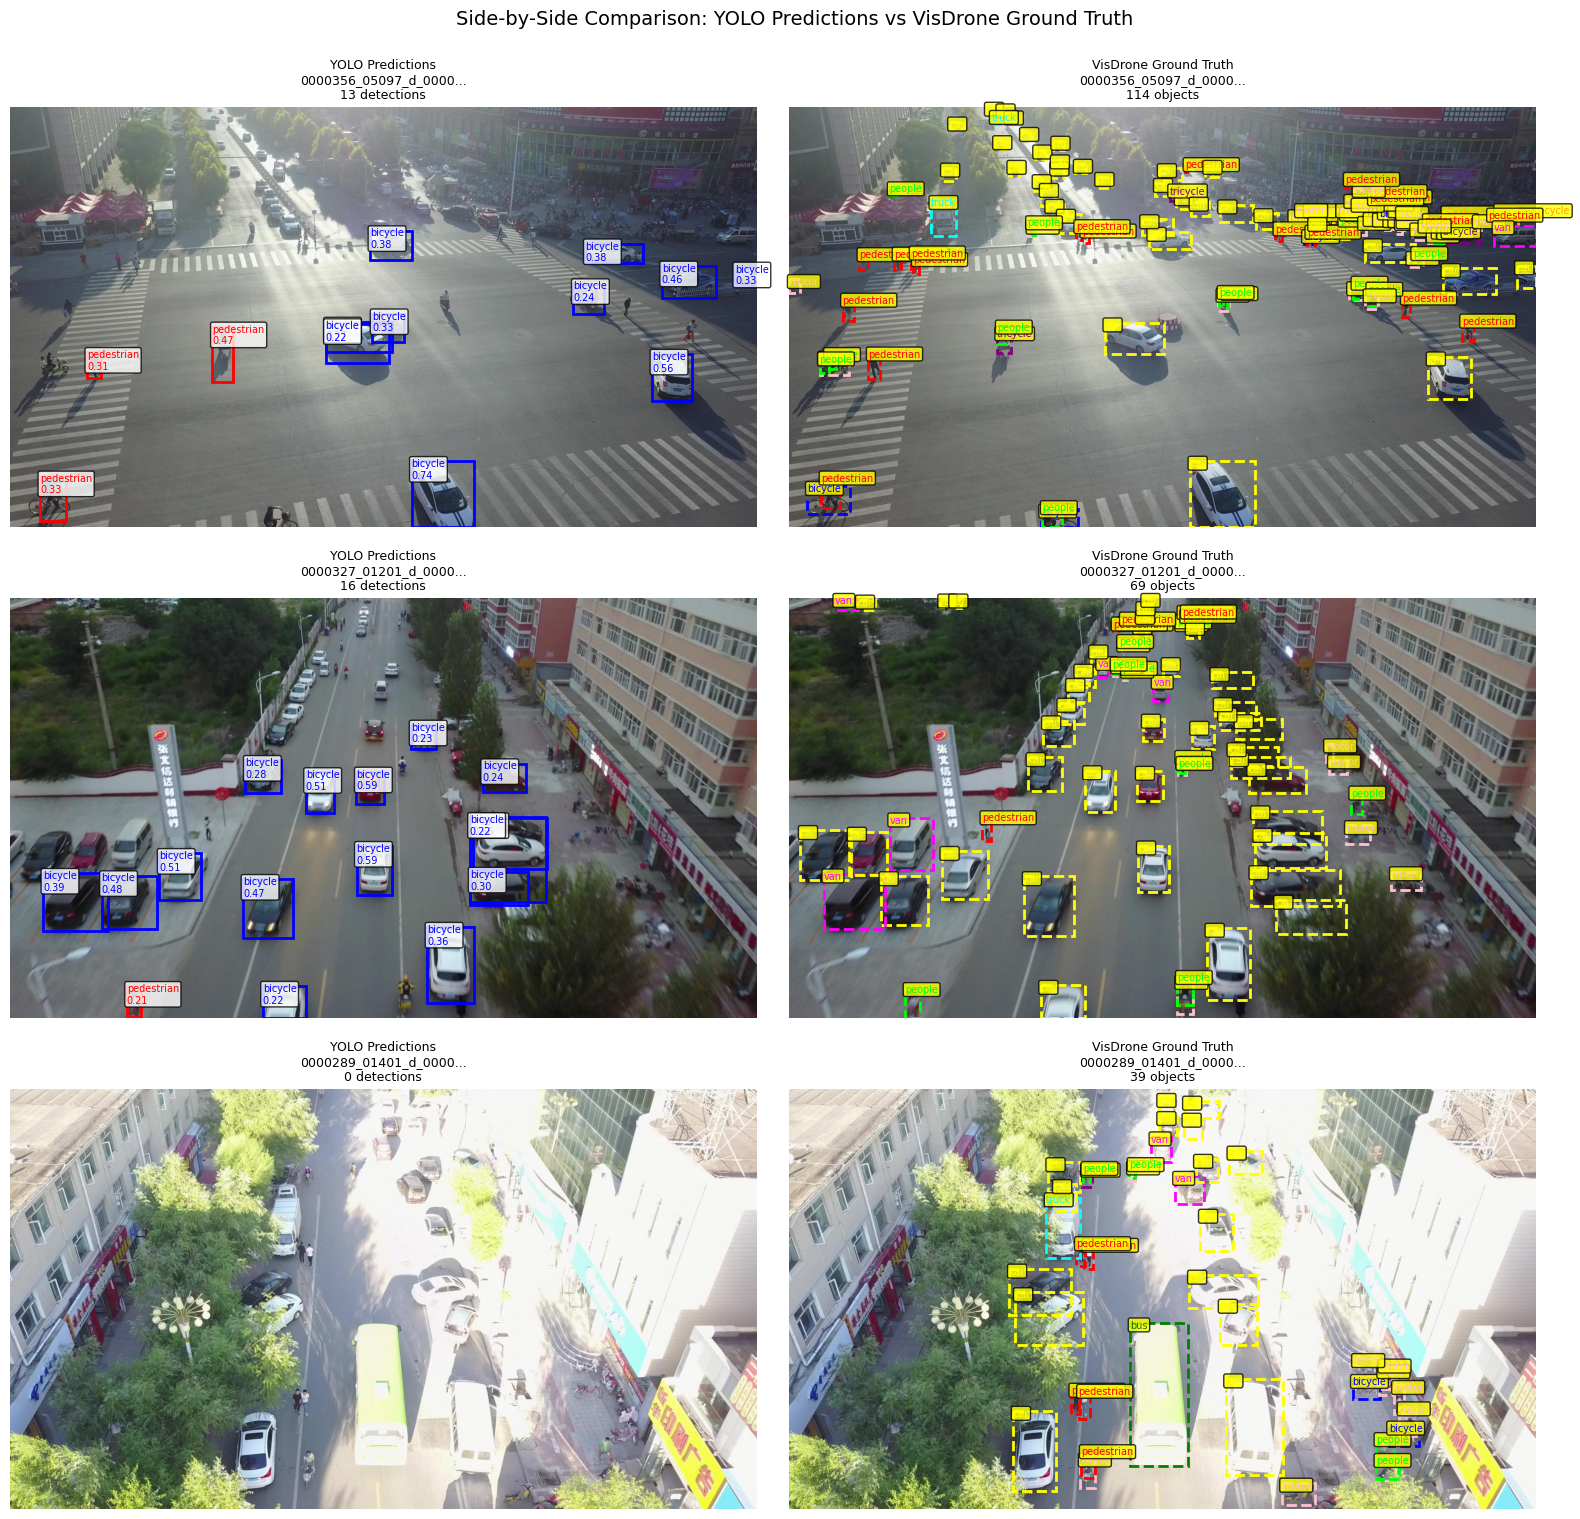


📖 INTERPRETATION GUIDE:
🔵 LEFT SIDE (YOLO Predictions):
   • Solid boxes with confidence scores
   • White background labels
   • Shows what pretrained YOLO detects

🔶 RIGHT SIDE (VisDrone Ground Truth):
   • Dashed boxes (-- style)
   • Yellow background labels
   • Shows what should be detected

🎯 COMPARISON INSIGHTS:
   • Missing boxes on left = YOLO missed objects
   • Extra boxes on left = YOLO false positives
   • Different positions = Localization errors
   • This shows why drone-specific training helps!

🏷️ CLASS LEGEND:
   0: pedestrian (#FF0000)
   1: people (#00FF00)
   2: bicycle (#0000FF)
   3: car (#FFFF00)
   4: van (#FF00FF)
   5: truck (#00FFFF)
   6: tricycle (#800080)
   7: awning-tricycle (#FFA500)
   8: bus (#008000)
   9: motor (#FFC0CB)

✅ Side-by-side visualization complete!

🚀 KEY OBSERVATIONS TO LOOK FOR:
1. 📉 YOLO typically detects FEWER objects than ground truth
2. 🎯 YOLO may miss small/distant objects (aerial view challenge)
3. 🔍 YOLO may detect different 

In [12]:
# CELL 9: Visualize YOLO Predictions vs Original VisDrone Ground Truth
print("\n🖼️ YOLO PREDICTIONS vs ORIGINAL VISDRONE ANNOTATIONS")
print("=" * 70)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import random

# Set up matplotlib for better display
plt.style.use('default')
plt.rcParams['figure.dpi'] = 100

try:
    # Load a fresh model for inference
    model = YOLO('yolo11n.pt')
    
    # Get test images and their corresponding annotations
    test_img_dir = project_root / "data" / "raw" / "vision" / "visdrone" / "VisDrone2019-DET-val" / "images"
    test_ann_dir = project_root / "data" / "raw" / "vision" / "visdrone" / "VisDrone2019-DET-val" / "annotations"
    
    if not test_img_dir.exists() or not test_ann_dir.exists():
        print("❌ Test images or annotations not found")
    else:
        # Get 3 random images for side-by-side comparison
        all_images = list(test_img_dir.glob("*.jpg"))
        sample_images = random.sample(all_images, min(3, len(all_images)))
        
        print(f"📸 Comparing YOLO predictions vs VisDrone ground truth for {len(sample_images)} images...")
        
        # Create subplots - 2 columns (YOLO vs Ground Truth) x 3 rows
        fig, axes = plt.subplots(len(sample_images), 2, figsize=(16, 5*len(sample_images)))
        if len(sample_images) == 1:
            axes = axes.reshape(1, -1)
        
        # Class names for both formats
        yolo_class_names = [
            'pedestrian', 'people', 'bicycle', 'car', 'van',
            'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor'
        ]
        
        visdrone_class_names = {
            0: 'ignored',
            1: 'pedestrian', 
            2: 'people',
            3: 'bicycle',
            4: 'car',
            5: 'van',
            6: 'truck', 
            7: 'tricycle',
            8: 'awning-tricycle',
            9: 'bus',
            10: 'motor'
        }
        
        # Colors for different classes
        colors = [
            '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF',
            '#00FFFF', '#800080', '#FFA500', '#008000', '#FFC0CB',
            '#8B4513'  # Extra color for ignored regions
        ]
        
        for idx, img_path in enumerate(sample_images):
            try:
                # Load image
                img = Image.open(img_path)
                img_width, img_height = img.size
                
                # === LEFT SIDE: YOLO PREDICTIONS ===
                axes[idx, 0].imshow(img)
                axes[idx, 0].set_title(f"YOLO Predictions\n{img_path.name[:25]}...", fontsize=10)
                axes[idx, 0].axis('off')
                
                # Run YOLO inference
                results = model.predict(
                    source=str(img_path),
                    imgsz=320,
                    conf=0.15,
                    device='cpu',
                    verbose=False,
                    save=False
                )
                
                yolo_detection_count = 0
                boxes = results[0].boxes
                
                if boxes is not None and len(boxes) > 0:
                    for box in boxes:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                        confidence = box.conf[0].cpu().numpy()
                        class_id = int(box.cls[0].cpu().numpy())
                        
                        if confidence < 0.2:
                            continue
                        
                        if class_id < len(yolo_class_names):
                            class_name = yolo_class_names[class_id]
                            color = colors[class_id % len(colors)]
                        else:
                            class_name = f"class_{class_id}"
                            color = '#FFFFFF'
                        
                        # Draw YOLO prediction box
                        width = x2 - x1
                        height = y2 - y1
                        
                        rect = patches.Rectangle(
                            (x1, y1), width, height,
                            linewidth=2, edgecolor=color, facecolor='none', linestyle='-'
                        )
                        axes[idx, 0].add_patch(rect)
                        
                        # Add YOLO label
                        label = f"{class_name}\n{confidence:.2f}"
                        axes[idx, 0].text(
                            x1, y1-5, label, 
                            fontsize=7, color=color, 
                            bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8),
                            verticalalignment='top'
                        )
                        
                        yolo_detection_count += 1
                
                # === RIGHT SIDE: VISDRONE GROUND TRUTH ===
                axes[idx, 1].imshow(img)
                axes[idx, 1].set_title(f"VisDrone Ground Truth\n{img_path.name[:25]}...", fontsize=10)
                axes[idx, 1].axis('off')
                
                # Load VisDrone annotations
                annotation_path = test_ann_dir / f"{img_path.stem}.txt"
                visdrone_detection_count = 0
                
                if annotation_path.exists():
                    with open(annotation_path, 'r') as f:
                        for line in f:
                            line = line.strip()
                            if not line:
                                continue
                            
                            parts = line.split(',')
                            if len(parts) >= 6:
                                try:
                                    # Parse VisDrone format: left,top,width,height,score,class
                                    left = int(parts[0])
                                    top = int(parts[1])
                                    width = int(parts[2])
                                    height = int(parts[3])
                                    score = float(parts[4]) if parts[4] != '' else 1.0
                                    obj_class = int(parts[5])
                                    
                                    # Skip ignored regions and invalid boxes
                                    if obj_class == 0 or width <= 0 or height <= 0:
                                        continue
                                    
                                    # Get class name and color
                                    class_name = visdrone_class_names.get(obj_class, f"class_{obj_class}")
                                    # Map VisDrone class to color (adjust for class offset)
                                    color_idx = obj_class - 1 if obj_class > 0 else 0
                                    color = colors[color_idx % len(colors)]
                                    
                                    # Draw VisDrone ground truth box
                                    rect = patches.Rectangle(
                                        (left, top), width, height,
                                        linewidth=2, edgecolor=color, facecolor='none', linestyle='--'
                                    )
                                    axes[idx, 1].add_patch(rect)
                                    
                                    # Add ground truth label
                                    label = f"{class_name}"
                                    axes[idx, 1].text(
                                        left, top-5, label, 
                                        fontsize=7, color=color, 
                                        bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.8),
                                        verticalalignment='top'
                                    )
                                    
                                    visdrone_detection_count += 1
                                    
                                except ValueError as e:
                                    continue
                
                # Update titles with detection counts
                axes[idx, 0].set_title(
                    f"YOLO Predictions\n{img_path.name[:20]}...\n{yolo_detection_count} detections", 
                    fontsize=9
                )
                axes[idx, 1].set_title(
                    f"VisDrone Ground Truth\n{img_path.name[:20]}...\n{visdrone_detection_count} objects", 
                    fontsize=9
                )
                
                print(f"   📊 {img_path.name}:")
                print(f"      🤖 YOLO detected: {yolo_detection_count} objects")
                print(f"      📋 Ground truth: {visdrone_detection_count} objects")
                
            except Exception as e:
                print(f"   ❌ Error processing {img_path.name}: {e}")
                for col in [0, 1]:
                    axes[idx, col].text(0.5, 0.5, f"Error loading\n{img_path.name}", 
                                      ha='center', va='center', transform=axes[idx, col].transAxes)
                    axes[idx, col].axis('off')
        
        plt.tight_layout()
        plt.suptitle("Side-by-Side Comparison: YOLO Predictions vs VisDrone Ground Truth", 
                     fontsize=14, y=1.02)
        plt.show()
        
        # Show interpretation guide
        print(f"\n📖 INTERPRETATION GUIDE:")
        print("=" * 50)
        print("🔵 LEFT SIDE (YOLO Predictions):")
        print("   • Solid boxes with confidence scores")
        print("   • White background labels")
        print("   • Shows what pretrained YOLO detects")
        print()
        print("🔶 RIGHT SIDE (VisDrone Ground Truth):")
        print("   • Dashed boxes (-- style)")
        print("   • Yellow background labels")
        print("   • Shows what should be detected")
        print()
        print("🎯 COMPARISON INSIGHTS:")
        print("   • Missing boxes on left = YOLO missed objects")
        print("   • Extra boxes on left = YOLO false positives")
        print("   • Different positions = Localization errors")
        print("   • This shows why drone-specific training helps!")
        
        # Show class legend
        print(f"\n🏷️ CLASS LEGEND:")
        for i, name in enumerate(yolo_class_names):
            color = colors[i % len(colors)]
            print(f"   {i}: {name} ({color})")
    
    # Clean up model
    del model
    gc.collect()
    
    print(f"\n✅ Side-by-side visualization complete!")
    
except Exception as e:
    print(f"❌ Visualization failed: {e}")
    print("💡 Make sure matplotlib and PIL are installed:")
    print("   pip install matplotlib pillow")

print(f"\n🚀 KEY OBSERVATIONS TO LOOK FOR:")
print("1. 📉 YOLO typically detects FEWER objects than ground truth")
print("2. 🎯 YOLO may miss small/distant objects (aerial view challenge)")
print("3. 🔍 YOLO may detect different object types than labeled")
print("4. 📏 Bounding box positions may not align perfectly")
print("5. 🎓 After training on VisDrone, performance should improve significantly!")

print(f"\n💡 NEXT STEPS BASED ON RESULTS:")
print("• If YOLO finds <50% of ground truth objects → Training will help a lot")
print("• If YOLO finds >80% of ground truth objects → Already quite good")
print("• Focus training on classes with biggest gaps")
print("• Use these insights to evaluate post-training improvements")